# Lab 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1
Write a script to generate the samples of a sinusoid whose frequency and sampling rate are specified by the user. Also display this in two separate figures, (i) as a continuous sinusoid, (ii) and as the individual samples. (hint: Use the plot and stem commands).

In [2]:
def sampling_sine(freq, rate):
  time = np.linspace(0,1,rate)
  wave = np.sin(2*np.pi*freq*time)

  plt.figure(figsize=(15,10))
  plt.subplot(211)
  plt.plot(time,wave)
  plt.subplot(212)
  plt.stem(time,wave,use_line_collection=True)

  plt.show()

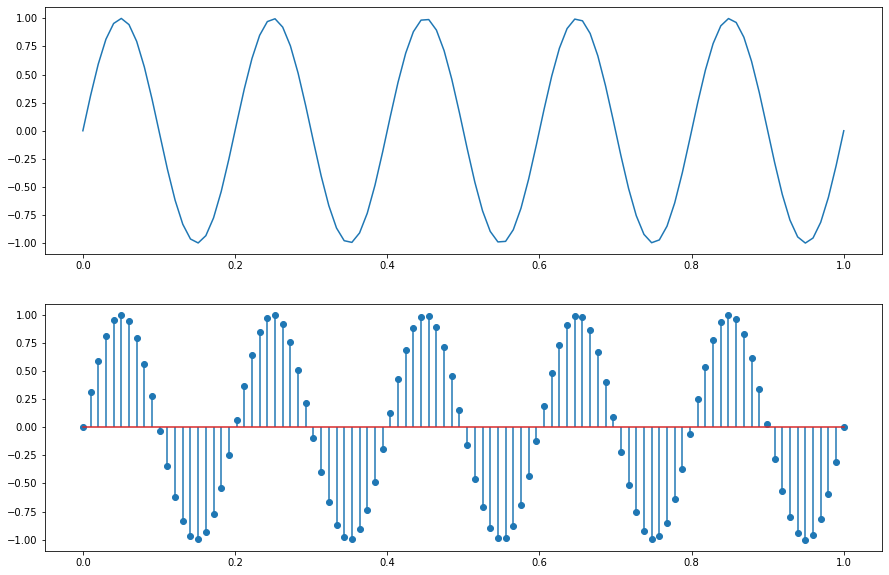

In [3]:
sampling_sine(5,100)

## Question 2
Write a script to generate a random vector of length 10000 using the rand command, and plot its
histogram, and compare that against the uniform pdf in the range (0,1).

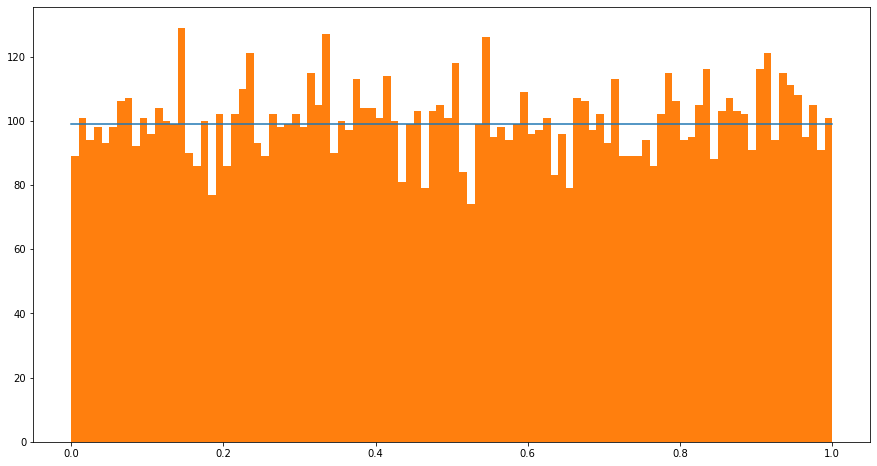

In [4]:
bin_size = 0.01
x = np.random.rand(10000)
bins = np.arange(0,1 + bin_size,bin_size)

plt.figure(figsize=(15,8))
plt.plot((10000/len(bins))*np.ones(2))
plt.hist(x,bins=bins)
plt.show()

## Question 3
Repeat problem 2 using the randn and randi commands, and comment on the difference between
the outputs of the three random number generators.

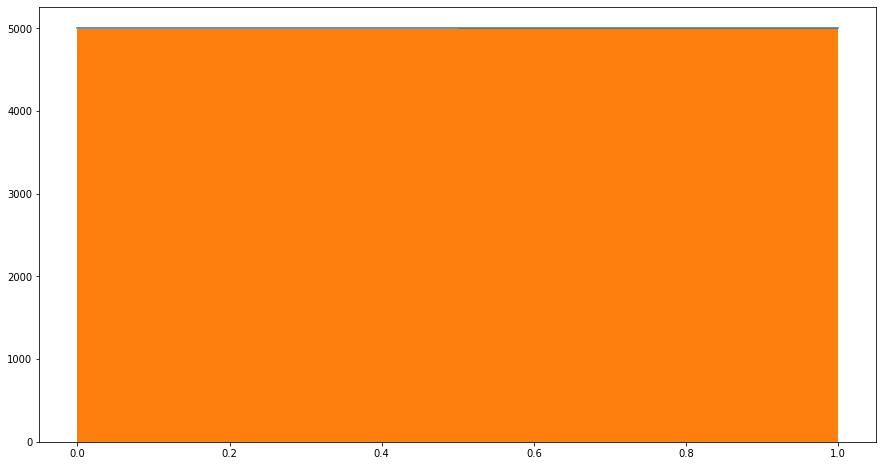

In [5]:
x = np.random.randint(0,2,size=(10000))
bins = [0,0.5,1]

plt.figure(figsize=(15,8))
plt.plot((10000/(len(bins)-1))*np.ones(2))
plt.hist(x,bins=bins)
plt.show()

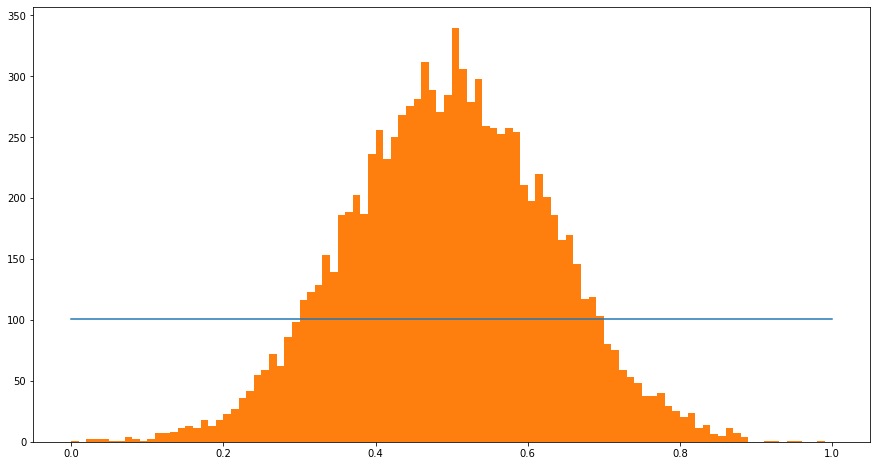

In [6]:
x = np.random.randn(10000)
x = (x + abs(x.min()))/(x.max()-x.min())
bins = np.arange(0,1,0.01)

plt.figure(figsize=(15,8))
plt.plot((10000/(len(bins)-1))*np.ones(2))
plt.hist(x,bins=bins)
plt.show()

## Question 4
Write a function ‘averg’ to numerically evaluate the average of an input vector. You may only use
the for loop and the length command.

In [7]:
def averg(x):
    sum = 0
    for i in x:
        sum+=i
    return (sum/len(x))


x = np.array([3,5,65,32,2,5,3,23])
averg(x)

17.25

## Question 5
Write a script to use the function ‘averg’ defined in problem 6 to evaluate empirical variance of
an input random vector.

In [8]:
def var(x):
    return (averg(x**2)-averg(x)**2)

x = np.array([3,5,65,32,2,5,3,23])
print(var(x))

433.6875


## Question 6
Write a function gateduty(N,d) to generate a rectangular pulse of length N with a duty cycle of
d%.

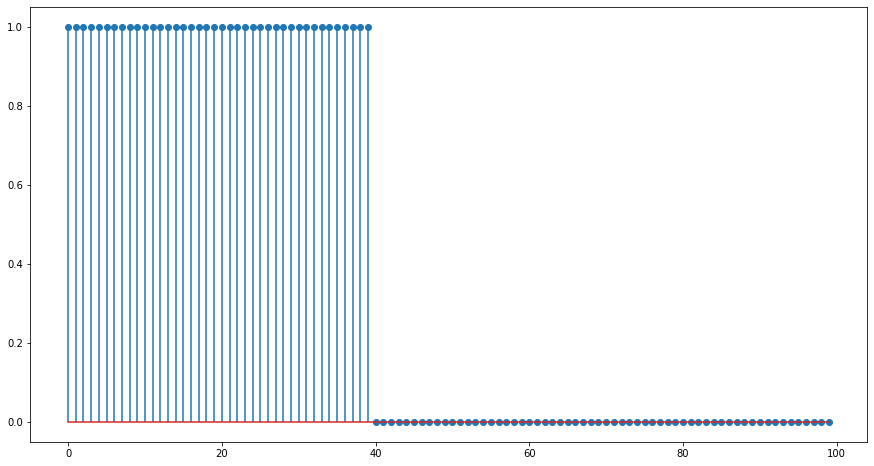

In [9]:
def gateduty(N, d):
    wave = np.ones(int(N*d/100))
    padded = np.pad(wave,(0,int(N-(N*d/100))))
    return padded

N, d = 100, 40
plt.figure(figsize=(15,8))
plt.stem(gateduty(N, d), use_line_collection=True)
plt.show()

## Question 7
Write a script to generate M periods of gateduty(N,d), and use the following commands to obtain
the power spectral density of the generated signal.
a. fft b.psd c. pwelch

Comment on the so obtained in your lab record for different values of M;N and D, and different
due to the use of different commands. What is the difference between these commands?

In [10]:
from scipy.signal import periodogram, welch
from scipy.fftpack import fft, fftfreq

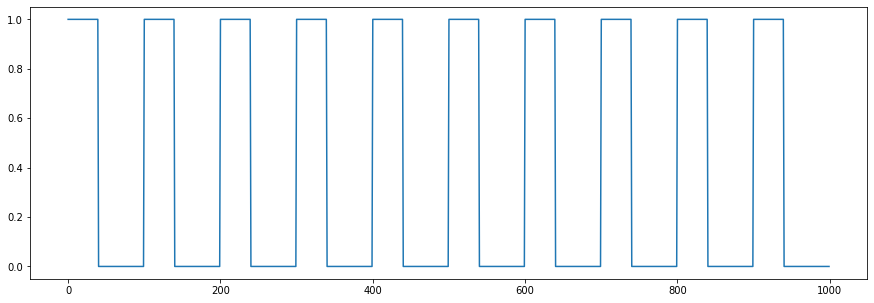

In [11]:
def gatedutySignal(M, N, d):
    x = gateduty(N, d)
    y=[]
    for i in range(M):
        y = np.concatenate((y,x))
    return y


M, N, d = 10, 100, 40
y = gatedutySignal(M, N, d)
plt.figure(figsize=(15,5))
plt.plot(y)
plt.show()

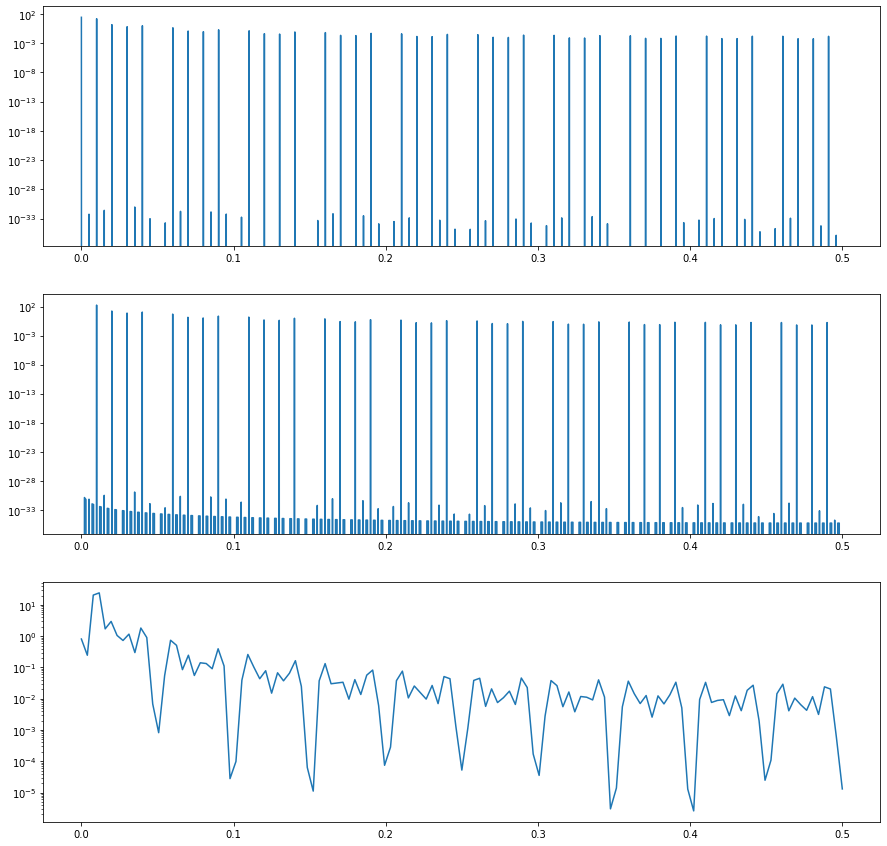

In [12]:
yfft = fft(y)
yfft = yfft[:N*M//2]
ypsdfft = (1/(2*np.pi*M*N))*(yfft**2)
ffft = np.linspace(0, 1/2, int(M*N/2))
fper, ypsdper = periodogram(y)
fwel, ypsdwel = welch(y)

plt.figure(figsize=(15,15))
plt.subplot(311)
plt.semilogy(ffft, abs(ypsdfft))
plt.subplot(312)
plt.semilogy(fper, abs(ypsdper))
plt.subplot(313)
plt.semilogy(fwel, abs(ypsdwel))

plt.show()

## Question 8
 Write a function sampmean(N), with an integer input N, for calculating the sample mean of N
zero mean Gaussian random variables having unit variance.

In [13]:
def sampmean(n):
    x = np.random.randn(n)
    return x.mean()

print(f'{sampmean(10000):.5f}')

-0.00109


## Question 9

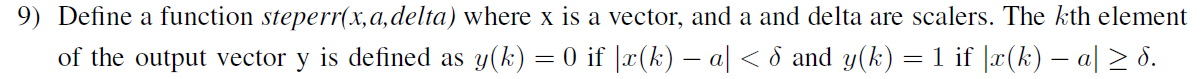

In [14]:
def steperr(x,a,delta):
    y=[]
    for i in x:
        diff = abs(i-a)
        if diff<delta:
            y.append(0)
        else:
            y.append(1)
    return y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


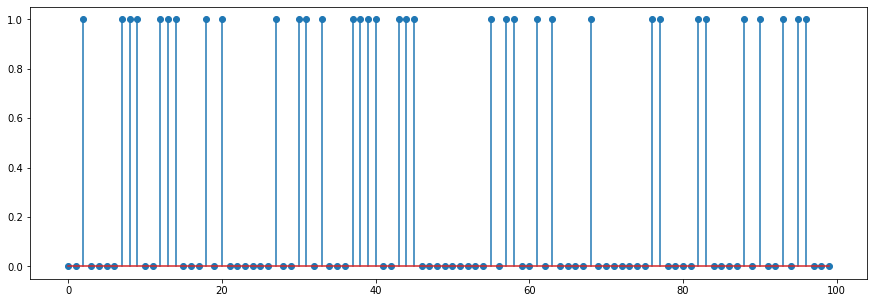

In [15]:
x = np.random.rand(100)
a = 0.5
delta = 0.3

plt.figure(figsize=(15,5))
plt.stem(steperr(x,a,delta))
plt.show()

## Question 10
Define a function MSE(x; a) with x being a vector and a a scaler to calculate the mean squared difference between the entries of x and a.

In [16]:
def MSE(x,a):
  return ((x-a)**2).mean()

x = np.random.rand(1000)
print(MSE(x,0.5))

0.0821410007691529


## Question 11
Generate 10000 realizations of t = sampmean(N) for values of N going from 1 to 100, calculate
the corresponding mean squared error for each value of N using the MSE function, and plot MSE
as a function of N in both linear as well as logarithmic scale. Comment on this behavior.

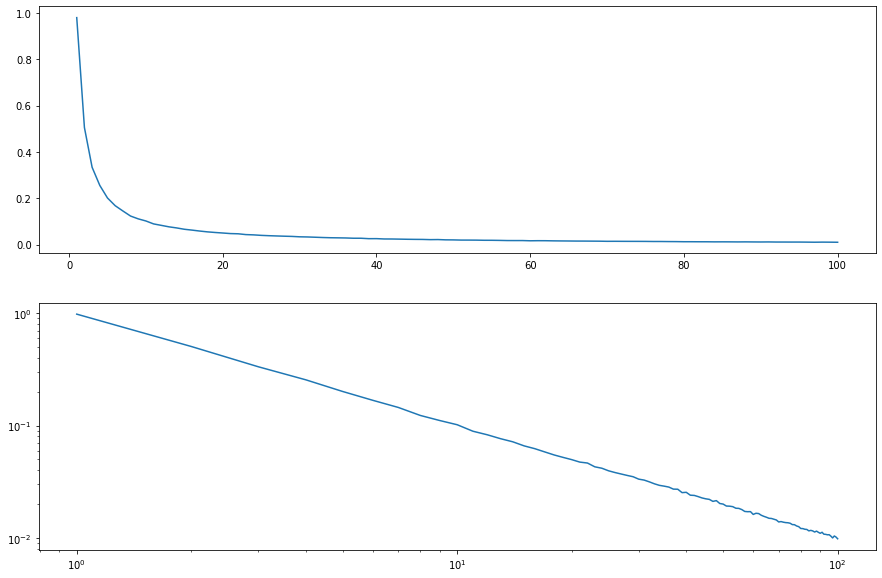

In [17]:
y = []
Ns = np.arange(1,101,1)

for n in Ns:
    x = [] 
    for _ in range(10000):
        x.append(sampmean(n))
    y.append(MSE(x,np.mean(x)))

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(Ns,y)
plt.subplot(212)
plt.loglog(Ns,y)
plt.show()


## Question 12
Find a way to calculate the probability of error using steperr() for a given value of delta. With
an error event being defined as the case when the sample mean of a zero mean Gaussian random
variable exceeds the value delta. Use your method to calculate the probability of error in sampmean()
as a function of N for $ \delta $ = 0.1 ; 0.01 ; 0.001.




In [18]:
n = 50
deltas = [0.1,0.01,0.001]

x= [sampmean(n) for i in range(10000)]

for delta in deltas:
    y = steperr(x,0,delta)
    prob = np.sum(y)/len(y)
    print(f"For delta = {delta}, the probability of error is {prob:.2f}")


For delta = 0.1, the probability of error is 0.49
For delta = 0.01, the probability of error is 0.94
For delta = 0.001, the probability of error is 0.99
